In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import numpy as np
np.random.seed(0)

In [126]:
import pandas as pd

In [127]:
df = pd.read_csv("C:\\Users\\Nitin Yadav\\Trading Algorithms\\stock_market_new_updated.csv")
df

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,...,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction
0,2021,9,27,1,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,1
1,2021,9,27,2,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,0
2,2021,9,27,3,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,2,0
3,2021,9,27,4,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,2,1
4,2021,9,27,5,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12976,2024,2,20,6,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,0
12977,2024,2,20,7,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,2,0
12978,2024,2,20,8,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,1,1
12979,2024,2,20,9,0,0,0,0,0,0,...,0,0,0,0,2,78.739998,0,0,1,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12981 entries, 0 to 12980
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    12981 non-null  int64  
 1   Month                   12981 non-null  int64  
 2   Day                     12981 non-null  int64  
 3   Hour                    12981 non-null  int64  
 4   Minute                  12981 non-null  int64  
 5   EMASignal               12981 non-null  int64  
 6   isPivot                 12981 non-null  int64  
 7   CHOCH_pattern_detected  12981 non-null  int64  
 8   fibonacci_signal        12981 non-null  int64  
 9   SL                      12981 non-null  int64  
 10  TP                      12981 non-null  int64  
 11  MinSwing                12981 non-null  int64  
 12  MaxSwing                12981 non-null  int64  
 13  LBD_detected            12981 non-null  int64  
 14  LBH_detected            12981 non-null

In [130]:
# Selecting the subset of columns for features
X = df.drop(['Candle_direction'],axis='columns')


# Extracting the target variable
y = df['Candle_direction']

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=20,      # how many epochs to wait before stopping
    restore_best_weights=True
)

# Initialising the NN
model = Sequential()

# Adding layers with Batch Normalization and Dropout
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=39))
model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN with a custom optimizer
opt = Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN with validation split and early stopping callback
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150
260/260 [==============================] - 6s 7ms/step - loss: 0.6931 - accuracy: 0.5008 - val_loss: 0.6930 - val_accuracy: 0.5282
Epoch 2/150
260/260 [==============================] - 1s 5ms/step - loss: 0.6929 - accuracy: 0.5276 - val_loss: 0.6920 - val_accuracy: 0.5282
Epoch 3/150
260/260 [==============================] - 1s 5ms/step - loss: 0.6899 - accuracy: 0.5698 - val_loss: 0.7012 - val_accuracy: 0.4718
Epoch 4/150
260/260 [==============================] - 1s 5ms/step - loss: 0.6713 - accuracy: 0.6029 - val_loss: 1.0113 - val_accuracy: 0.4718
Epoch 5/150
260/260 [==============================] - 1s 5ms/step - loss: 0.6528 - accuracy: 0.6131 - val_loss: 5.6581 - val_accuracy: 0.4718
Epoch 6/150
260/260 [==============================] - 1s 5ms/step - loss: 0.6492 - accuracy: 0.6112 - val_loss: 0.7775 - val_accuracy: 0.5460
Epoch 7/150
260/260 [==============================] - 1s 5ms/step - loss: 0.6431 - accuracy: 0.6131 - val_loss: 1.6569 - val_accuracy: 0.4718

Epoch 58/150
260/260 [==============================] - 1s 5ms/step - loss: 0.5520 - accuracy: 0.6623 - val_loss: 9.2993 - val_accuracy: 0.5282
Epoch 59/150
260/260 [==============================] - 1s 5ms/step - loss: 0.5553 - accuracy: 0.6703 - val_loss: 0.6911 - val_accuracy: 0.5282
Epoch 60/150
260/260 [==============================] - 1s 5ms/step - loss: 0.5482 - accuracy: 0.6746 - val_loss: 11.2004 - val_accuracy: 0.5282


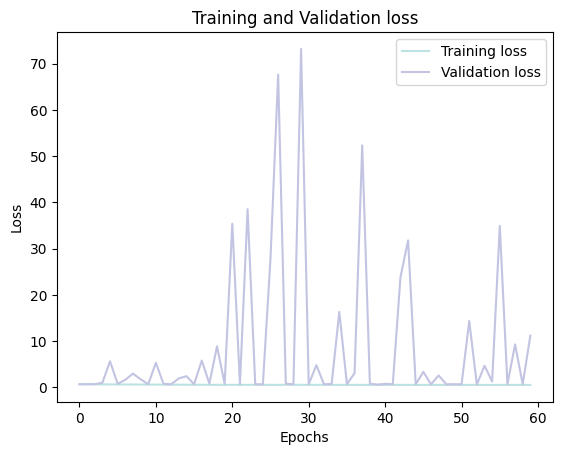

In [142]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

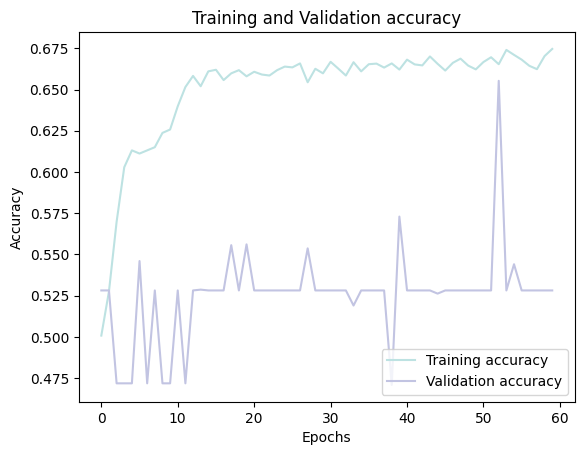

In [143]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [173]:
# Predicting the test set results
y_pred = model.predict(X_test)


82/82 [==============================] - 0s 3ms/step


In [174]:
X_test

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,isBreakOut,candlestick_signal,result,signal1,buy_signal,Position,sell_signal,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal
7826,2023,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0,0,2
12273,2024,1,3,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,1
11635,2023,11,19,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0,0,2
8439,2023,4,20,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,0,1,1,0,0,1,1,0,0,0,0,0,0.0,0,0,1
12130,2023,12,21,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,2023,8,31,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,1
6113,2022,11,10,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,1,0,1,0,1,0,1,0,0,0,0,0,0.0,0,0,2
3315,2022,5,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0,0,1
10463,2023,9,5,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0,0,2


In [175]:
import numpy as np

# Assuming 2023, 8, 30, 5, 0 are the values you want to predict on
input_data = np.array([[2022, 9, 13, 9, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                       ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  # Convert the values into a 2D array

# Perform prediction
prediction = model.predict(input_data)

print(prediction)


1/1 [==============================] - 0s 51ms/step
[[0.39098424]]


In [176]:
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)
print(y_pred)


[[0.41546887]
 [0.49799502]
 [0.45002368]
 [0.35575974]
 [0.4488572 ]
 [0.5077142 ]
 [0.36951908]
 [0.44539204]
 [0.45379   ]
 [0.38418925]
 [0.4301617 ]
 [0.45050296]
 [0.37091246]
 [0.4178113 ]
 [0.77891856]
 [0.04689393]
 [0.4469895 ]
 [0.43258426]
 [0.35420775]
 [0.47238994]
 [0.49401674]
 [0.7687268 ]
 [0.30776578]
 [0.96310693]
 [0.06226381]
 [0.37668478]
 [0.37904584]
 [0.41763824]
 [0.35905328]
 [0.39312246]
 [0.8728974 ]
 [0.41559407]
 [0.3713338 ]
 [0.45880497]
 [0.434407  ]
 [0.04376001]
 [0.39063415]
 [0.33021647]
 [0.31199193]
 [0.39759216]
 [0.3661671 ]
 [0.4953962 ]
 [0.4842535 ]
 [0.39615998]
 [0.05416084]
 [0.34714508]
 [0.43452778]
 [0.46900934]
 [0.31658357]
 [0.2917869 ]
 [0.4682257 ]
 [0.44513002]
 [0.3645207 ]
 [0.45087248]
 [0.38904253]
 [0.37601033]
 [0.8938793 ]
 [0.39975402]
 [0.35365373]
 [0.4195524 ]
 [0.39374763]
 [0.47516832]
 [0.39979655]
 [0.49729487]
 [0.879447  ]
 [0.0640917 ]
 [0.8881017 ]
 [0.4568462 ]
 [0.5075702 ]
 [0.41340834]
 [0.31354716]
 [0.43

In [158]:
pd.set_option('display.max_columns', None)
y_test[0:100]

7826     1
12273    1
11635    1
8439     0
12130    0
        ..
3669     1
7157     0
1261     0
7959     0
647      1
Name: Candle_direction, Length: 100, dtype: int64

In [166]:
y_pred.to_csv('y_prediction_new.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'